In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn_extra.cluster import KMedoids

In [2]:
data = pd.read_csv('../data/cluster_type_vs_factor.csv', low_memory=False)

In [3]:
df = data[['ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1']]
df = df[df['ON STREET NAME'].notna()]
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'].notna()]

In [4]:
encoder = LabelEncoder()
for col in df.columns:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

X = df.values[:5000]

In [6]:
wcss = []
for i in range(1, 11): 
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++')
    kmedoids.fit(X) 
    wcss.append(kmedoids.inertia_)

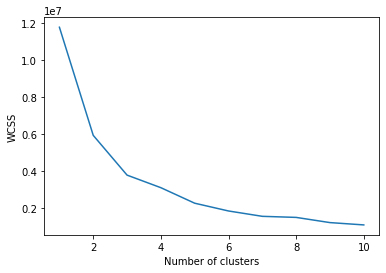

In [7]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [10]:
kmedoids = KMedoids(n_clusters=4, method='pam', init='k-medoids++')
y_kmedoids = kmedoids.fit_predict(X)

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

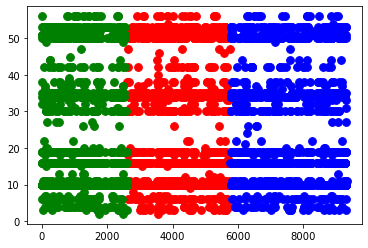

In [9]:
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(y_kmedoids.cluster_centers_[:, 0], y_kmedoids.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend() 
plt.show()